In [1]:
from nets import ConvDecoder, Classifier
from fep import FEP
import torch
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
with open("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/data/inside_rot_rgb8_1_10k_norm_np.pkl", 'rb') as f:
    data = pickle.load(f)

pose, img = data

environment = "outside"
decoder = ConvDecoder()
decoder.load_state_dict(torch.load("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/deconv_inside_rot_4_400e.pt"))
decoder.eval()

classifier = Classifier()
classifier.load_state_dict(torch.load("/home/simon/catkin_ws/src/turtlebot3_gazebo/scripts/trained_conv_nets/classifier_1_100e.pt"))
classifier.eval()

fep = FEP(environment, decoder, classifier)

[0.67483742 0.795      0.29524902]


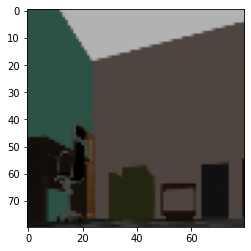

[0.13406703 0.692      0.55664792]


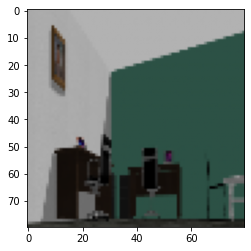

In [6]:
fep.dt = 0.02
fep.sigma = 1e4

start_int = random.randint(0, pose.shape[0])
goal_int = random.randint(0, pose.shape[0])

start_pose = pose[start_int]
start_img = img[start_int]

goal_pose = pose[goal_int]
goal_img = img[goal_int]

iterations = 100

print(start_pose)
plt.imshow(start_img.transpose(1,2,0))
plt.show()
print(goal_pose)
plt.imshow(goal_img.transpose(1,2,0))
plt.show()

res = fep.run(start_pose, goal_img, iterations)

path = np.array([x[0] for x in res])
imgs = np.array([x[1].detach().numpy().squeeze().transpose(1,2,0) for x in res])

0.6284408261565447 0.8862958848221023


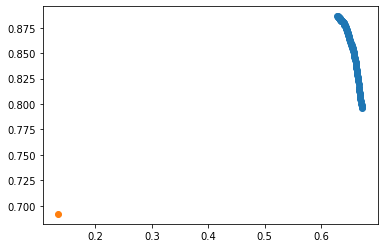

In [7]:
print(path[-1, 0], path[-1, 1])
plt.scatter(path[:, 0], path[:, 1])
plt.scatter(goal_pose[0], goal_pose[1])
# plt.xlim(0, 1)
# plt.ylim(0, 1)
plt.show()

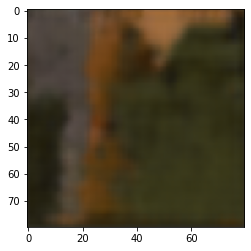

In [15]:
inp = [0.00601965, 0.22525046, 0.12314498]

outp = decoder.forward(torch.tensor(inp))
pred = outp.detach().numpy().squeeze().transpose(1,2,0)
plt.imshow(pred)
plt.show()

[0.50985887 0.83403678 0.25869488]


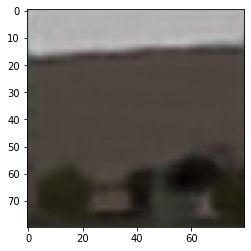

[0.51001983 0.83155445 0.2586685 ]


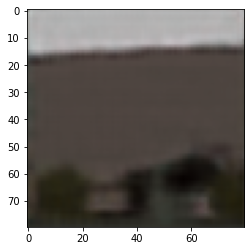

[0.51013013 0.82908211 0.25919268]


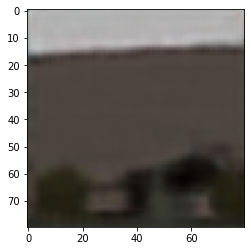

[0.51018208 0.82694596 0.25891661]


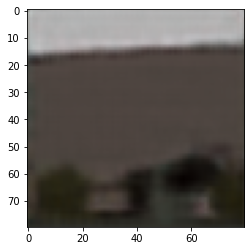

[0.51026605 0.82470841 0.25883295]


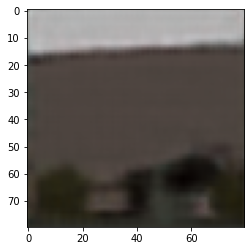

[0.51039069 0.82262006 0.25887947]


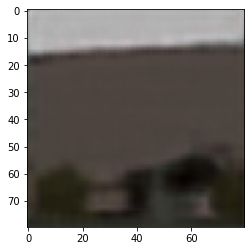

[0.51050179 0.82074677 0.25857797]


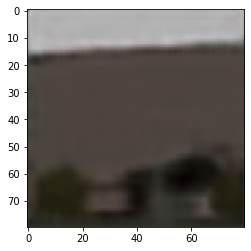

[0.51063046 0.81858292 0.25793414]


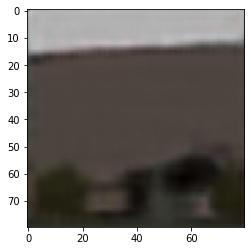

[0.5107318  0.81667418 0.2572087 ]


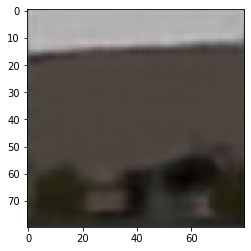

[0.51091831 0.81467328 0.25699909]


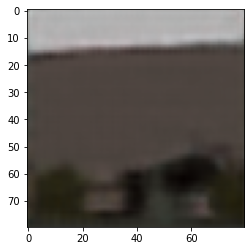

[0.51113346 0.81270983 0.25670169]


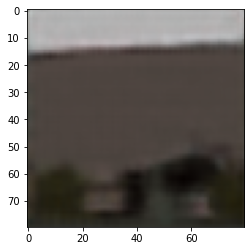

[0.51128471 0.8104617  0.25545411]


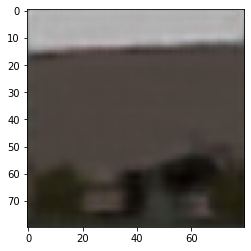

[0.51161481 0.80806464 0.25580242]


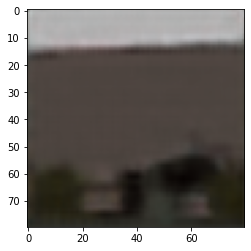

[0.51187836 0.8057744  0.256205  ]


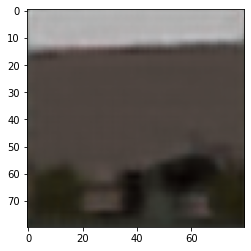

[0.51218087 0.80324583 0.2567531 ]


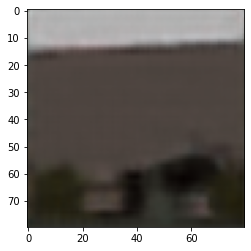

[0.51239223 0.80060333 0.25589158]


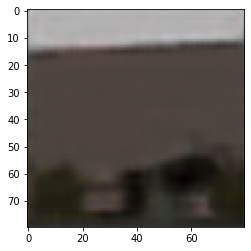

[0.51281514 0.79813472 0.25623279]


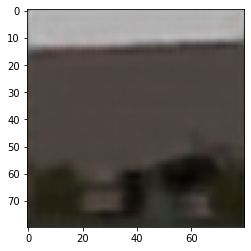

[0.51314249 0.79545341 0.25440019]


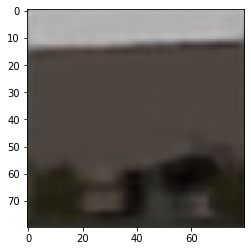

[0.51355291 0.79283037 0.25402242]


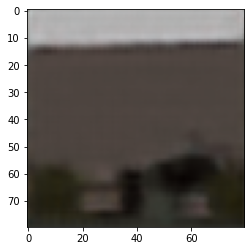

[0.51395829 0.79031177 0.25313598]


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [16]:
for i, x in enumerate(path):
    print(x)
    plt.imshow(imgs[i])
    plt.show()